In [2]:
import pandas as pd
import numpy as np
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:
from IPython.display import display, HTML
df = pd.read_csv('/Users/areebakamil/Downloads/turnover.csv', sep=',', encoding='ISO-8859-1')
display(HTML(df.head(10).to_html()))
# print(df.columns.values)


,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.03,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.97,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.93,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.93,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.41,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
5,8.97,1,f,42.0,manufacture,HR,empjs,yes,m,white,bus,6.2,6.2,4.1,5.6,6.7
6,8.97,1,f,42.0,manufacture,HR,empjs,yes,m,white,bus,6.2,6.2,4.1,5.6,6.7
7,120.44,1,f,28.0,Retail,HR,referal,no,m,white,bus,3.8,5.5,8.0,4.0,4.4
8,8.61,1,f,29.0,Banks,HR,empjs,no,f,white,bus,8.6,6.9,2.6,4.0,7.5
9,4.44,1,f,30.0,Consult,Marketing,youjs,yes,m,white,bus,5.4,5.5,3.3,7.9,8.3


In [12]:
# check for missing values
print('\ncheck for missing values')
print(df.isnull().sum())




check for missing values
stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64


In [17]:
print('\n df.info()')
print(df.info())

print('\ndf.describe()')
display(HTML(df.describe().to_html()))


 df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB
None

df.describe()


,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator
count,1129.00,1129.00,1129.00,1129.00,1129.00,1129.00,1129.00,1129.00
mean,36.63,0.51,31.07,5.59,5.48,5.60,5.67,5.88
std,34.10,0.50,7.00,1.85,1.70,1.98,1.71,1.90
min,0.39,0.00,18.00,1.00,1.00,1.00,1.70,1.00
25%,11.73,0.00,26.00,4.60,4.10,4.10,4.80,4.40
50%,24.34,1.00,30.00,5.40,5.50,5.70,5.60,6.00
75%,51.32,1.00,36.00,7.00,6.90,7.20,7.10,7.50
max,179.45,1.00,58.00,10.00,10.00,10.00,10.00,10.00


In [18]:
#Using Label enconder to label columns
df_copy = df.copy()
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        col_indx_arry = df_copy.columns.get_indexer([col])
        col_indx = int(col_indx_arry[0])
        col_name = col + '_num'
        labelencoder = LabelEncoder()
        values = labelencoder.fit_transform(df_copy[col])
        df_copy.insert(loc=col_indx, column=col_name, value=values)
        
print('\n dataframe with label encoded columns: \n')
display(HTML(df_copy.head(15).to_html()))


 dataframe with label encoded columns: 



,stag,event,gender_num,gender,age,industry_num,industry,profession_num,profession,traffic_num,traffic,coach_num,coach,head_gender_num,head_gender,greywage_num,greywage,way_num,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.03,1,1,m,35.0,2,Banks,6,HR,4,rabrecNErab,1,no,0,f,1,white,0,bus,6.2,4.1,5.7,7.1,8.3
1,22.97,1,1,m,33.0,2,Banks,6,HR,2,empjs,1,no,1,m,1,white,0,bus,6.2,4.1,5.7,7.1,8.3
2,15.93,1,0,f,35.0,8,PowerGeneration,6,HR,4,rabrecNErab,1,no,1,m,1,white,0,bus,6.2,6.2,2.6,4.8,8.3
3,15.93,1,0,f,35.0,8,PowerGeneration,6,HR,4,rabrecNErab,1,no,1,m,1,white,0,bus,5.4,7.6,4.9,2.5,6.7
4,8.41,1,1,m,32.0,10,Retail,2,Commercial,7,youjs,2,yes,0,f,1,white,0,bus,3.0,4.1,8.0,7.1,3.7
5,8.97,1,0,f,42.0,14,manufacture,6,HR,2,empjs,2,yes,1,m,1,white,0,bus,6.2,6.2,4.1,5.6,6.7
6,8.97,1,0,f,42.0,14,manufacture,6,HR,2,empjs,2,yes,1,m,1,white,0,bus,6.2,6.2,4.1,5.6,6.7
7,120.44,1,0,f,28.0,10,Retail,6,HR,6,referal,1,no,1,m,1,white,0,bus,3.8,5.5,8.0,4.0,4.4
8,8.61,1,0,f,29.0,2,Banks,6,HR,2,empjs,1,no,0,f,1,white,0,bus,8.6,6.9,2.6,4.0,7.5
9,4.44,1,0,f,30.0,4,Consult,9,Marketing,7,youjs,2,yes,1,m,1,white,0,bus,5.4,5.5,3.3,7.9,8.3


In [19]:
# get numerical columns only
df_num = df_copy.select_dtypes(exclude=["object_"])
print('Dataframe with numerical columns only (including label encoded columns)\n')
display(HTML(df_num.head(10).to_html()))


Dataframe with numerical columns only (including label encoded columns)



,stag,event,gender_num,age,industry_num,profession_num,traffic_num,coach_num,head_gender_num,greywage_num,way_num,extraversion,independ,selfcontrol,anxiety,novator
0,7.03,1,1,35.0,2,6,4,1,0,1,0,6.2,4.1,5.7,7.1,8.3
1,22.97,1,1,33.0,2,6,2,1,1,1,0,6.2,4.1,5.7,7.1,8.3
2,15.93,1,0,35.0,8,6,4,1,1,1,0,6.2,6.2,2.6,4.8,8.3
3,15.93,1,0,35.0,8,6,4,1,1,1,0,5.4,7.6,4.9,2.5,6.7
4,8.41,1,1,32.0,10,2,7,2,0,1,0,3.0,4.1,8.0,7.1,3.7
5,8.97,1,0,42.0,14,6,2,2,1,1,0,6.2,6.2,4.1,5.6,6.7
6,8.97,1,0,42.0,14,6,2,2,1,1,0,6.2,6.2,4.1,5.6,6.7
7,120.44,1,0,28.0,10,6,6,1,1,1,0,3.8,5.5,8.0,4.0,4.4
8,8.61,1,0,29.0,2,6,2,1,0,1,0,8.6,6.9,2.6,4.0,7.5
9,4.44,1,0,30.0,4,9,7,2,1,1,0,5.4,5.5,3.3,7.9,8.3


In [21]:
# checking number of columns in the original and lable encoded dataset
print('length of the original dataframe:')
print(len(df.columns))
print ('length of the label-encoded dataframe:') 
print(len(df_num.columns))

# Ensure all the columns have been ecnoded
print('column names of the original data frame')
print(df.columns.values)
print('column names of the label encoded data frame')
print(df_num.columns.values)

length of the original dataframe:
16
length of the label-encoded dataframe:
16
column names of the original data frame
['stag' 'event' 'gender' 'age' 'industry' 'profession' 'traffic' 'coach'
 'head_gender' 'greywage' 'way' 'extraversion' 'independ' 'selfcontrol'
 'anxiety' 'novator']
column names of the label encoded data frame
['stag' 'event' 'gender_num' 'age' 'industry_num' 'profession_num'
 'traffic_num' 'coach_num' 'head_gender_num' 'greywage_num' 'way_num'
 'extraversion' 'independ' 'selfcontrol' 'anxiety' 'novator']


In [30]:
# checking number of columns in the original and lable encoded dataset
print('length of the original dataframe:')
print(len(df.columns))
print ('length of the label-encoded dataframe:') 
print(len(df_num.columns))

length of the original dataframe:
16
length of the label-encoded dataframe:
16


In [31]:
# Ensure all the columns have been ecnoded
print(df.columns.values)
print(df_num.columns.values)


['stag' 'event' 'gender' 'age' 'industry' 'profession' 'traffic' 'coach'
 'head_gender' 'greywage' 'way' 'extraversion' 'independ' 'selfcontrol'
 'anxiety' 'novator']
['stag' 'event' 'gender_num' 'age' 'industry_num' 'profession_num'
 'traffic_num' 'coach_num' 'head_gender_num' 'greywage_num' 'way_num'
 'extraversion' 'independ' 'selfcontrol' 'anxiety' 'novator']


In [32]:
fig = px.pie(df, "event", color='event', hole=.3)
fig.show()

Matplotlib is building the font cache; this may take a moment.


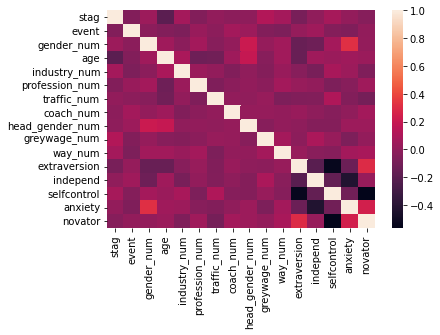

In [23]:
# coorelation matrix
import seaborn as sn
import matplotlib.pyplot as plt

df_corr = df_num.corr()
sn.heatmap(df_corr, annot=False)
plt.show()

In [24]:
# preparing for data for modeling:
X = df_num.drop(columns=['event'])
y = df_num['event']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

models = {}

In [25]:
def train_validate_predict(classifiers, x_train, y_train, x_test, y_test, index):
    model = classifiers
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    r2 = accuracy_score(y_test, y_pred)
    models[index] = r2

In [26]:
model_names = ['SVC', 'DecisionTreeClassifier', 'AdaBoostClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier', 'LogisticRegression', 'GradientBoostingClassifier']
model_list = [SVC, DecisionTreeClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, LogisticRegression, GradientBoostingClassifier]

index = 0
for classifiers in model_list:
    train_validate_predict(classifiers(), X_train, y_train, X_test, y_test, model_names[index])
    index+=1

print(models)
# print(type(models))

/Users/areebakamil/.pyenv/versions/3.6.7/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



{'SVC': 0.5530973451327433, 'DecisionTreeClassifier': 0.6548672566371682, 'AdaBoostClassifier': 0.5486725663716814, 'RandomForestClassifier': 0.6371681415929203, 'ExtraTreesClassifier': 0.668141592920354, 'LogisticRegression': 0.5752212389380531, 'GradientBoostingClassifier': 0.6106194690265486}
<class 'dict'>


In [28]:
sorted_models_by_result = sorted(models.items(), key=lambda x:x[1])
print(sorted_models_by_result)


[('AdaBoostClassifier', 0.5486725663716814), ('SVC', 0.5530973451327433), ('LogisticRegression', 0.5752212389380531), ('GradientBoostingClassifier', 0.6106194690265486), ('RandomForestClassifier', 0.6371681415929203), ('DecisionTreeClassifier', 0.6548672566371682), ('ExtraTreesClassifier', 0.668141592920354)]


In [29]:
# From the above we can see that ExtraTreesClassifier performs the best
# we will not train the model using ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67       112
           1       0.67      0.70      0.69       114

    accuracy                           0.68       226
   macro avg       0.68      0.68      0.68       226
weighted avg       0.68      0.68      0.68       226



In [31]:
# Considering the above, we can see that the accuracy is not that high. 
# This is not surprising as the correlation map does not show strong relation between event and the other variables in the data